# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd
data = pd.read_csv('data.csv')
data.head()
# df = df.drop(['publish_date'], axis=1)
data = data.rename(columns = {'headline_text': 'text'})
data['text'] = data['text'].astype(str)
data = data.loc[:9999]
data.head()

,publish_date,text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [2]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['text'].apply(pol)
data['subjectivity'] = data['text'].apply(sub)
data

,publish_date,text,polarity,subjectivity
0,20030219,aba decides against community broadcasting lic...,0.00,0.00
1,20030219,act fire witnesses must be aware of defamation,0.25,0.25
2,20030219,a g calls for infrastructure protection summit,0.00,0.00
3,20030219,air nz staff in aust strike for pay rise,0.00,0.00
4,20030219,air nz strike to affect australian travellers,0.00,0.00
...,...,...,...,...
9995,20030407,vic govt plan aims to reduce water use,0.00,0.00
9996,20030407,vic govt urged to green light marina plan,0.10,0.50
9997,20030407,vic nats leave door open on coalition,0.00,0.50
9998,20030407,waterfall survivors tell of train speeding before,0.00,0.00


In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

for index, file in enumerate(data.index):
    x = data.polarity.loc[file]
    y = data.subjectivity.loc[file]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['publish_date'][index], fontsize=10)
    plt.xlim(-.01, .30) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000026219CCB9C0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000026219CE9580> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,publish_date,text,polarity,subjectivity
0,20030219,aba decides against community broadcasting lic...,0.00,0.00
1,20030219,act fire witnesses must be aware of defamation,0.25,0.25
2,20030219,a g calls for infrastructure protection summit,0.00,0.00
3,20030219,air nz staff in aust strike for pay rise,0.00,0.00
4,20030219,air nz strike to affect australian travellers,0.00,0.00
...,...,...,...,...
9995,20030407,vic govt plan aims to reduce water use,0.00,0.00
9996,20030407,vic govt urged to green light marina plan,0.10,0.50
9997,20030407,vic nats leave door open on coalition,0.00,0.50
9998,20030407,waterfall survivors tell of train speeding before,0.00,0.00


In [10]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.text:
    split = split_text(t,20)
    list_pieces.append(split)
    
    
list_pieces

ZeroDivisionError: division by zero

In [11]:
# The list has 10 elements, one for each transcript
len(list_pieces)

843

In [12]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

15

In [13]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

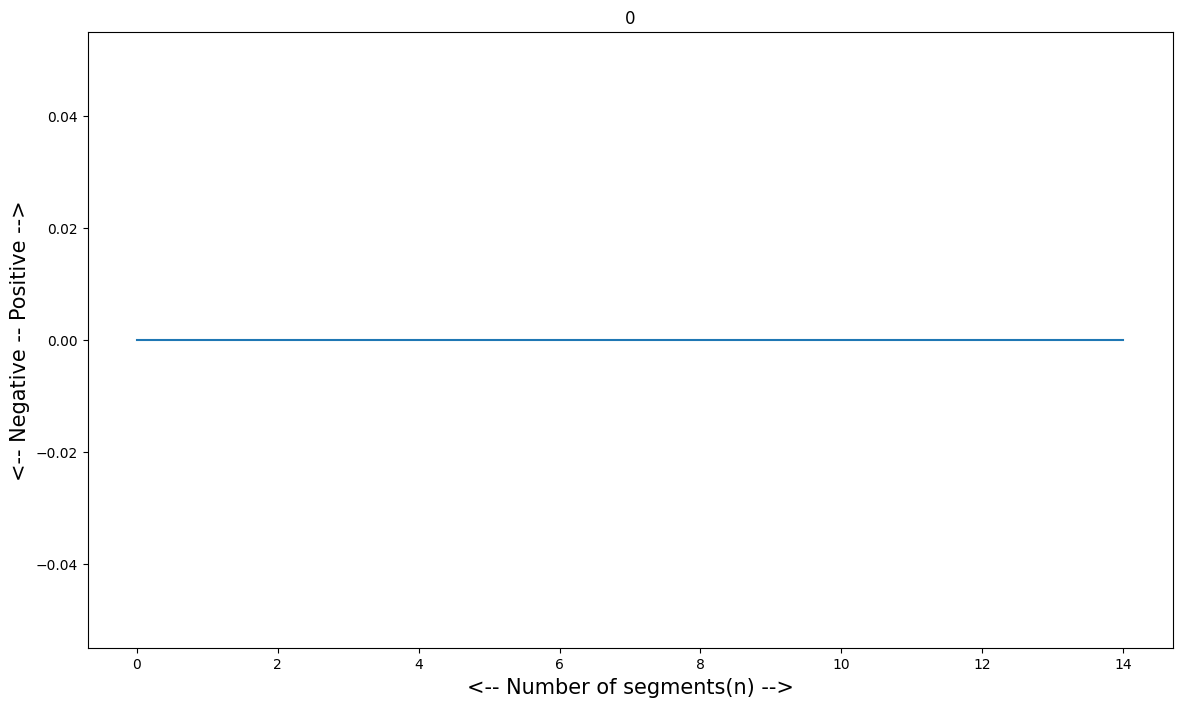

In [15]:
# Show the plot for one file
plt.plot(polarity_transcript[0])
plt.title(data['publish_date'].index[0])
plt.xlabel('<-- Number of segments(n) -->', fontsize=15)
plt.ylabel('<-- Negative -- Positive -->', fontsize=15)
plt.show()

ValueError: num must be an integer with 1 <= num <= 42, not 43

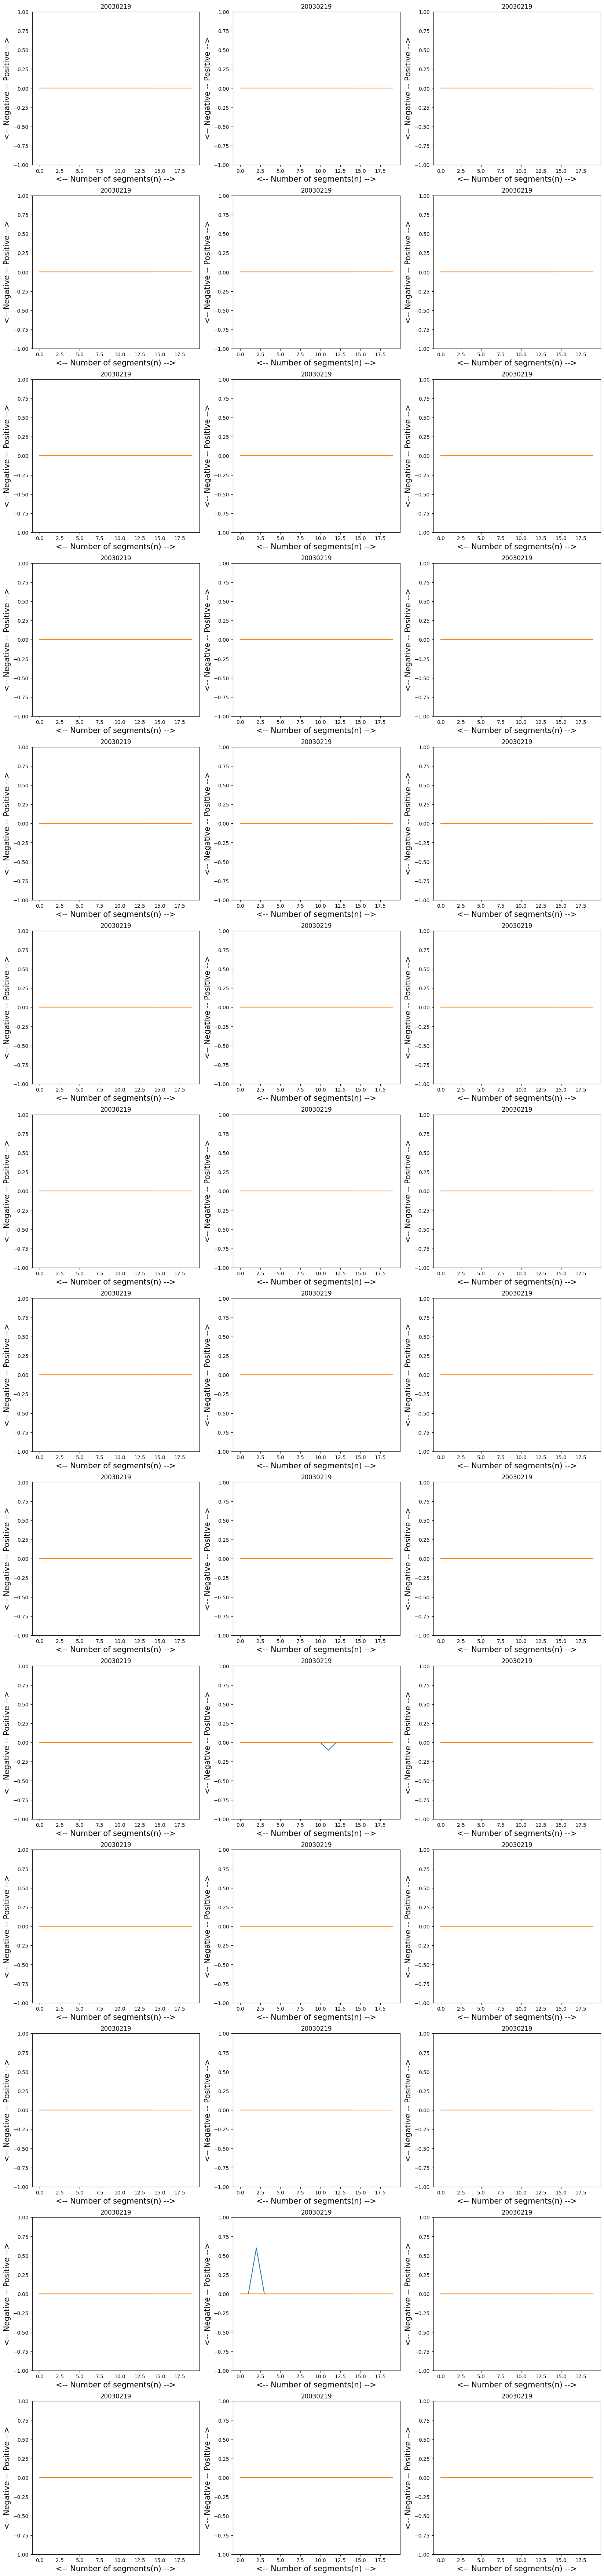

In [17]:
# Show the plot for all files
plt.rcParams['figure.figsize'] = [20, 90]

for index, file in enumerate(data.index):    
    plt.subplot(14, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['publish_date'][index])
    plt.xlabel('<-- Number of segments(n) -->', fontsize=15)
    plt.ylabel('<-- Negative -- Positive -->', fontsize=15)
    plt.ylim(ymin=-1, ymax=1)
    
plt.show()

In [18]:
# Calculate the subjectivity for each piece of text

subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

KeyError: 'name'

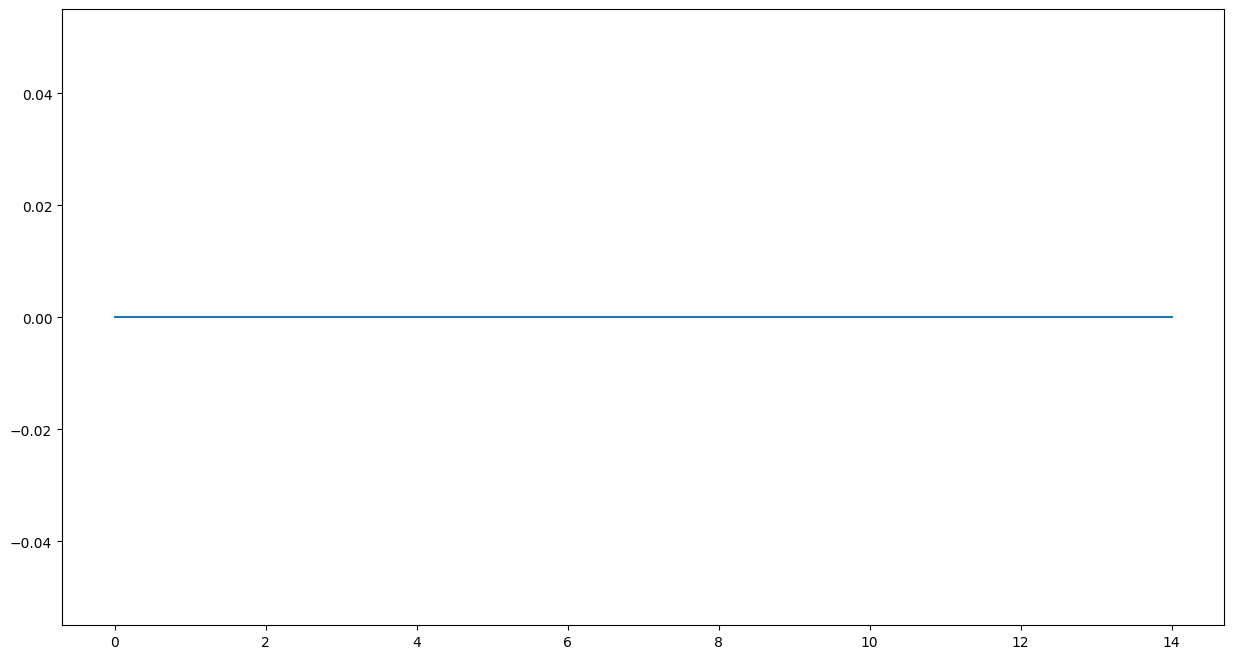

In [19]:
# Show the plot for one file
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(subjectivity_transcript[0])
plt.title(data['name'].index[0])
plt.xlabel('<-- Number of segments(n) -->', fontsize=15)
plt.ylabel('<-- Facts -- Opinions -->', fontsize=15)
plt.show()

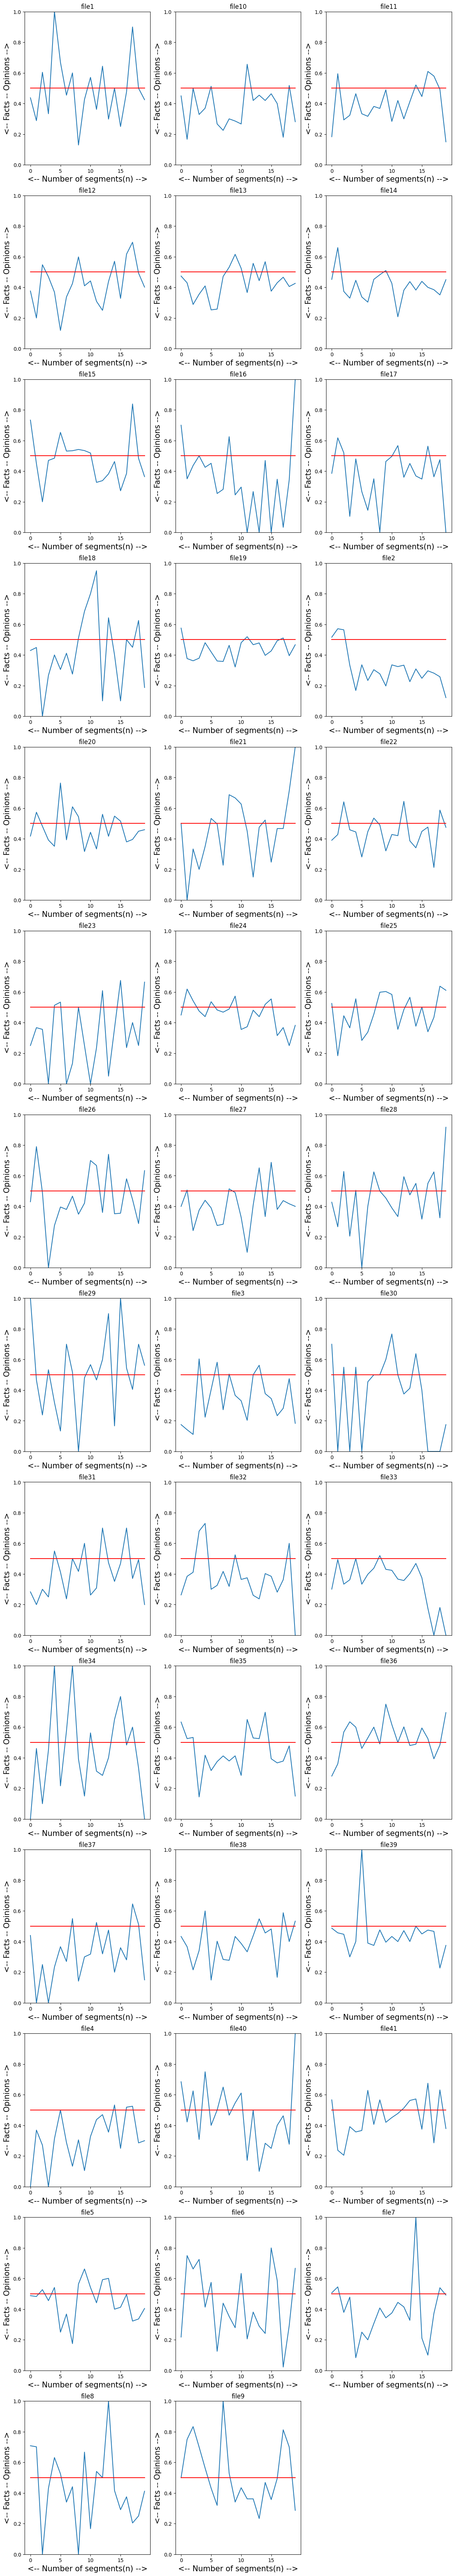

In [32]:
# Show the plot for all files
plt.rcParams['figure.figsize'] = [15, 90]

for index, file in enumerate(data.index):    
    plt.subplot(14, 3, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0, 20), np.full(20, 0.5), color='red')
    plt.title(data['name'][index])
    plt.xlabel('<-- Number of segments(n) -->', fontsize=15)
    plt.ylabel('<-- Facts -- Opinions -->', fontsize=15)
    plt.ylim(ymin=0, ymax=1)
    
plt.show()

### Assignments:
1. Classify all file according to Polarity and Subjectivity.
2. Modify the number of sections the file routine is split into and see how the charts over time change and again classify all file accordig to Polarity and Subjectivity.


## **Final Findings**
- **polarity** :  
        - Files 7, 9, 10, 13, 19, 23, 24, 27, 30, 35, 37 have positive sentiments  
        - Files 1, 3, 4, 5, 6, 11, 12, 14, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 31, 32, 33, 34, 36, 38 ,39 ,40 and 41 have some text segments that have negative polarity.  
        - Files 2 have negative sentiment.
- **subjectivity** :  
        - Files 2, 3, 4, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 24, 25, 27, 28, 33, 37, 38 have more facts than opinion.  
        - Files 1, 9, 29, 34 have more opinionated text.   
        - Files 5, 6, 7, 8, 15, 18, 20, 26, 30, 31, 32, 35, 36, 39, 40 and 41 have some text segments with  subjectivity close to 1 and some with subjectivity close to 0.  

In [1]:
!pip install datasets

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python311\\Scripts\\get_gprof'
Consider using the `--user` option or check the permissions.




   ---------------------------------------- 0.0/510.5 kB ? eta -:--:--
   ------------------------- ------------- 337.9/510.5 kB 10.2 MB/s eta 0:00:01
   ---------------------------------------  501.8/510.5 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 510.5/510.5 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/143.5 kB ? eta -:--:--
   ---------------------------------------  143.4/143.5 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------  143.4/143.5 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 143.5/143.5 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   -------------------------------------- - 112.6/116.3 kB ? eta -:--:--
   ---------------------------------------- 116.3/116.3 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.4
    Uninstalling dill-0.3.4:
      Successfully uninstalled dill-0.3.4
  Rolling

In [3]:
from datasets import load_dataset

dataset = load_dataset("Programming-Language/codeagent-python")

ModuleNotFoundError: No module named 'datasets'